# Linear Regression  on a Combined Cycle Power Plant (CCPP) data
## Dataset description

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

In [1]:
from __future__ import division  
# to get in-line plots
%matplotlib nbagg
import matplotlib.pyplot as plt

## Import Data
Load the data from a .csv file

In [2]:
# Load the data
import pandas as pd

df = pd.read_csv('ccpp_Data.csv', sep = ';')
Data = df.values  # Numpy array with data

# A quick overview of data

To inspect the data you can use the method describe()

In [3]:
df.describe() # to get info on the data

,AT,V,AP,RH,PE
count,5569.000000,5569.000000,5569.000000,5569.000000,5569.00000
mean,19.690587,54.403031,1013.234469,73.459759,454.24341
std,7.482110,12.741350,5.917864,14.706668,17.08875
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.520000,41.740000,1009.050000,63.380000,439.49000
50%,20.380000,52.750000,1012.940000,75.160000,451.64000
75%,25.790000,66.540000,1017.280000,84.960000,468.17000
max,37.110000,81.560000,1033.290000,100.160000,495.23000


# Split data in training and validation sets

Given $N$ total data, keep $N_t$ data as training data and $N_{val}:=N-N_t$ as validation data
Splitting is random and based on your ``numero di matricola''.



In [4]:
# Test data

#Xte = Data[:round(df.shape[0]/3),:-1]
#Yte = Data[:round(df.shape[0]/3),-1]


# Training-Validation data

X = Data[int(df.shape[0]/3):,:-1]
Y = Data[int(df.shape[0]/3):,-1]

N = X.shape[0]

Nt = 1000  #Training data
Nval = N-Nt # Validation data

# Split data into train and validation data
from sklearn.cross_validation import train_test_split
Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size=Nval/N)
Ntr = Xtr.shape[0]
Nva = Xva.shape[0]


## Data Prepocessing 

Design matrix is standardized to have zero-mean and unit variance (columnwise)

In [5]:
# Standardize the Features Matrix
from sklearn import preprocessing
# Xtr = preprocessing.scale(Xtr) 
scaler = preprocessing.StandardScaler().fit(X)
Xtr = scaler.transform(Xtr)
Xva = scaler.transform(Xva)  # use the same transformation on test data

## Compute the Linear Regression coefficients

First add a column of ones to the design matrix (use the numpy function  hstack) and then solve in the least squares sense

In [6]:
# Compute Linear Regression using numpy
import numpy as np
Xtr = np.hstack((np.ones((Ntr,1)),Xtr))
Xva = np.hstack((np.ones((Nva,1)),Xva))
b_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(Xtr, Ytr)


# alternatively could do direct calculation:
# U, S, V = np.linalg.svd(np.dot(np.transpose(Xtr), Xtr))

Sigma_inv = np.linalg.pinv(np.dot(np.transpose(Xtr), Xtr))  # use pseudoiverse to make sure things work also if Xtr is low rank
b_np1 = np.dot(np.dot(Sigma_inv,np.transpose(Xtr)),Ytr)
RSStr_np1 = np.linalg.norm(Ytr-np.dot(Xtr, b_np))**2

print "LS coefficients:", b_np
print "LS coefficients 1:", b_np1

print "RSS:",  RSStr_np
print "RSS1: ", RSStr_np1



LS coefficients: [  4.54156398e+02  -1.46476207e+01  -2.97704132e+00   2.69574883e-01
  -2.16621616e+00]
LS coefficients 1: [  4.54156398e+02  -1.46476207e+01  -2.97704132e+00   2.69574883e-01
  -2.16621616e+00]
RSS: [ 20029.13734666]
RSS1:  20029.1373467


## Data prediction 

Compute the output predictions on both training and validation set

In [7]:
# Compute predictions
Yhat_tr_np = np.dot(Xtr, b_np)
Yhat_va_np = np.dot(Xva, b_np)

## ... and plot:


### (1) output predictions on training  data

<IPython.core.display.Javascript object>


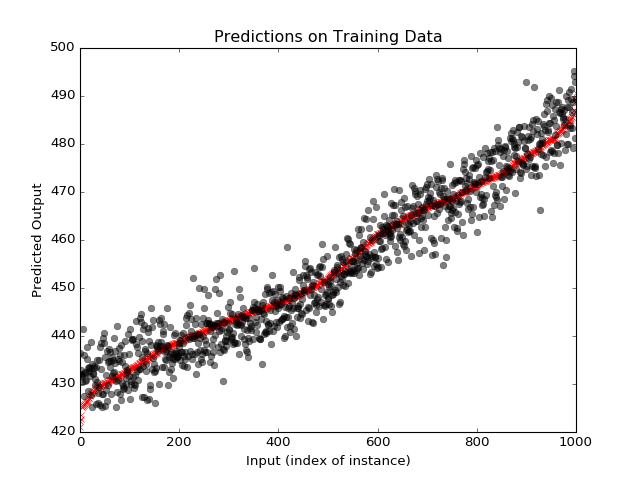

In [8]:
# Plot predictions on Training data 
plt.figure(1)
init_idx = 0
end_idx = Ntr

#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Yhat_tr_np[init_idx:end_idx])), key=lambda k: Yhat_tr_np[init_idx:end_idx][k])
plt.plot(Yhat_tr_np[sorting_permutation], 'rx')
plt.plot(Ytr[sorting_permutation], 'ko', alpha=0.5)

#plt.plot(Yhat_tr_np[init_idx:end_idx], 'r')
#plt.plot(Ytr[init_idx:end_idx], 'k', alpha=0.5)
plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Training Data')
plt.show()

### (2) output predictions on validation  data

<IPython.core.display.Javascript object>


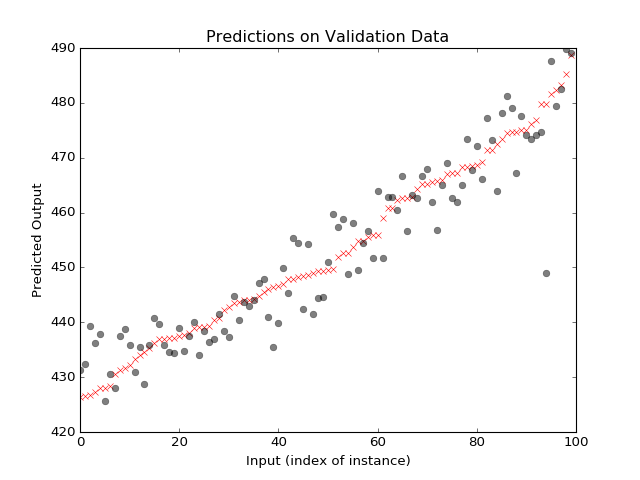

In [9]:
plt.figure(2)
init_idx = 0
end_idx = 100

#the following is just for nice plotting, not required
sorting_permutation = sorted(range(len(Yhat_va_np[init_idx:end_idx])), key=lambda k: Yhat_va_np[init_idx:end_idx][k])
plt.plot(Yhat_va_np[sorting_permutation], 'rx')
plt.plot(Yva[sorting_permutation], 'ko', alpha=0.5)

#plt.xlabel('Input (index of instance)')

#plt.plot(Yhat_va_np[init_idx:end_idx], 'r')
#plt.plot(Yva[init_idx:end_idx], 'k', alpha=0.5)
plt.xlabel('Input (index of instance)')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Training vs. Validation

Compute training and validation error

In [10]:
# Compute Training and Validation Error
ErrTr = np.linalg.norm(Ytr-Yhat_tr_np)**2/np.linalg.norm(Ytr-Ytr.mean())**2
ErrVa = np.linalg.norm(Yva-Yhat_va_np)**2/np.linalg.norm(Yva-Yva.mean())**2
print "Training Error:", ErrTr
print "Validation Error:", ErrVa

Training Error: 0.0688273590386
Validation Error: 0.0767281221041


## Hypothesis testing:

Test significance of each LS coefficients: find rejection regions for the null hypothesis

$$
H_0 : \beta_j =0
$$

The rejection region (with type-1 probability of error $\alpha$) has the form

$$
{\cal R_j}:=\left\{|\hat \beta_j|> \Delta\right\} \quad \quad \Delta: = \hat\sigma z_{jj}  t_{1-\frac{\alpha}{2}}(N_t-p-1)
$$
where
$$
\hat\sigma^2 : = \frac{1}{N_t-p-1} RSS(\hat\beta)
$$
is the estimator of the noise variance, $z_{jj}$ is the square root of the $j-th$ diagonal element of $\left(X^\top X\right)^{-1}$ (here $X$ contains only the training data) and $t_{1-\frac{\alpha}{2}}(N_t-p-1)$ is the $1-\frac{\alpha}{2}$-percentile of the $T$ distribution with $N_t-p-1$ degrees of freedom ($p=4$ in our case), i.e. 
$$
Pr[T(N_t-p-1)\leq t_{1-\frac{\alpha}{2}}(N_t-p-1)] = 1-\frac{\alpha}{2}
$$



In [11]:
# fixing type-1 error probability and compute percentiles

from scipy.stats import t

alpha = 0.05

tperc = t.ppf(1-alpha/2, Ntr-Xtr.shape[1], loc=0, scale=1)

# Estimate noise variance
sigma2 = np.linalg.norm(Ytr-Yhat_tr_np)**2/(Ntr-Xtr.shape[1])


# Compute size of the rejection regions

Ri = np.linalg.inv(np.dot(Xtr.transpose(),Xtr))
v = np.sqrt(np.diag(Ri))
Delta = np.sqrt(sigma2)*v*tperc


# we call ``acceptance region'' the complement of the rejection region. 

# Each row of the matrix A contains the extrem points of the Acceptance region ${\cal A}_j:={\cal R_j}^c$

A = np.transpose(np.vstack((-Delta,+Delta) ))



## Inspect Rejection Regions
Now let's have a look at the acceptance regions. The $j-th$ row of the matrix $A$ contains the lower and upper intervals (respectively) of the acceptance region for the test above on the $j-th$ coefficient $\beta_j$. If $\hat\beta_j$ belongs to the acceptance region we can accept the hypothesis that the $j-th$ regressor is not relevant. 

In [12]:
print "LS coefficients:",  b_np
print "Acceptance Regions:", A

LS coefficients: [  4.54156398e+02  -1.46476207e+01  -2.97704132e+00   2.69574883e-01
  -2.16621616e+00]
Acceptance Regions: [[-0.27862781  0.27862781]
 [-0.67500475  0.67500475]
 [-0.5555571   0.5555571 ]
 [-0.33992948  0.33992948]
 [-0.35933839  0.35933839]]


Equivalently, we can translate by a quantity $\hat\beta_j$ the Acceptance region and accept the hypothesis $H_0$ if the translated interval contains the origin 



In [13]:
#print np.transpose(np.vstack((b_np,b_np)))
      
CI = np.transpose(np.vstack((b_np,b_np))) + A

print "Confidence Intervals:", CI

Confidence Intervals: [[  4.53877770e+02   4.54435026e+02]
 [ -1.53226254e+01  -1.39726159e+01]
 [ -3.53259841e+00  -2.42148422e+00]
 [ -7.03545925e-02   6.09504359e-01]
 [ -2.52555456e+00  -1.80687777e+00]]


Note that the intervals whose extremes are in $CI$ are nothing but the confidence intervals for $\beta$!

## Now plot confidence intervals (= translated acceptance regions!!!)

<IPython.core.display.Javascript object>


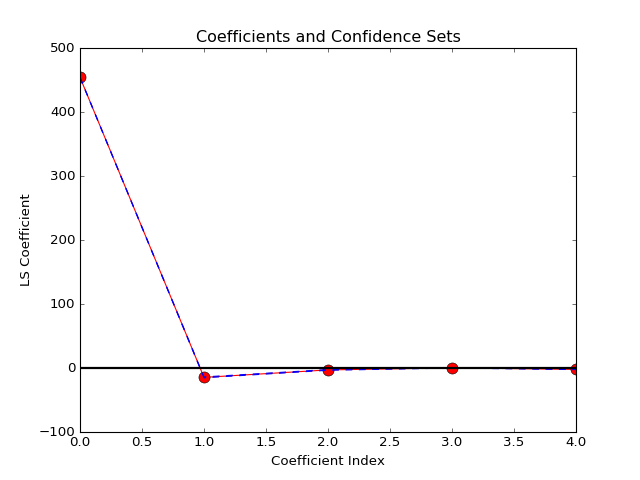

In [14]:
# Plot confidence intervals for the coeffients


plt.figure(3)
plt.plot(b_np, 'r', marker='o', ms=10.0)
plt.plot(CI[:,0], 'b--')
plt.plot(CI[:,1], 'b--')
plt.plot(np.zeros(b_np.shape[0],), 'k', linewidth=2.0)
plt.xlabel('Coefficient Index')
plt.ylabel('LS Coefficient')
plt.title('Coefficients and Confidence Sets')
plt.show()

# Remove useless regressors

Perform same as above removing not useful regressors


In [15]:
# reduced design matrix

Reg_sel = np.array([0,1,4])
Xtr_red = Xtr[:,Reg_sel]

Xva_red = Xva[:,Reg_sel]
b_np_red, RSStr_np_red, rank_Xtr_red, sv_Xtr_red = np.linalg.lstsq(Xtr_red, Ytr)

print "LS coefficients:", b_np_red

# Compute predictions
Yhat_tr_np_red = np.dot(Xtr_red, b_np_red)
Yhat_va_np_red = np.dot(Xva_red, b_np_red)

# Compute Training and Validation Error
ErrTr_red = np.linalg.norm(Ytr-Yhat_tr_np_red)**2/np.linalg.norm(Ytr-Ytr.mean())**2
ErrVa_red = np.linalg.norm(Yva-Yhat_va_np_red)**2/np.linalg.norm(Yva-Yva.mean())**2
print "Training Error (reduced regressors):", ErrTr_red
print "Validation Error:", ErrVa_red


LS coefficients: [ 454.13573968  -17.62732166   -2.82062938]
Training Error (reduced regressors): 0.0764821103158
Validation Error: 0.0863692958696


## Plot prediction on validation data reduced regression

<IPython.core.display.Javascript object>


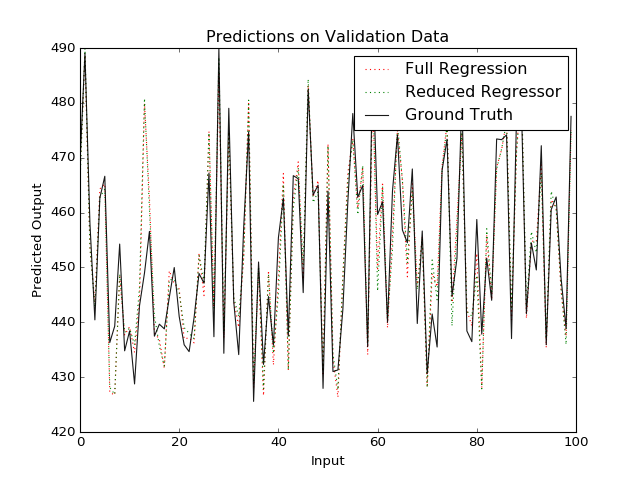

In [16]:
plt.figure(4)
init_idx = 0
end_idx = 100
plt.plot(Yhat_va_np[init_idx:end_idx], ':r')
plt.plot(Yhat_va_np_red[init_idx:end_idx], ':g')
plt.plot(Yva[init_idx:end_idx], 'k', alpha=0.9)
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.legend(['Full Regression','Reduced Regressor','Ground Truth'])
plt.show()

## Now show 3D plot with fitted hyperplane (only w.r.t. selected regressors) for training set


<IPython.core.display.Javascript object>


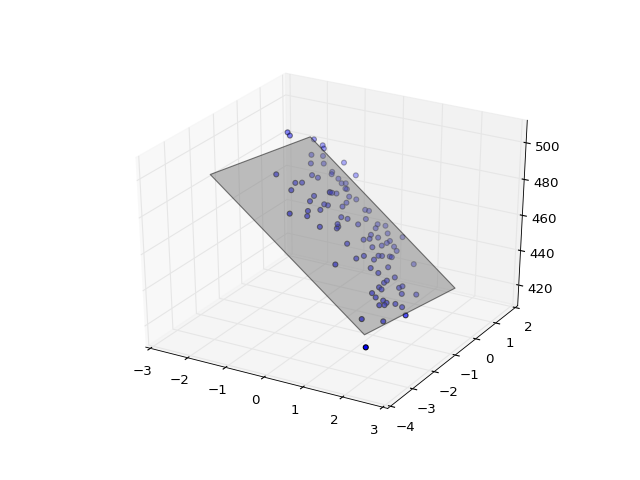

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
#plot only m=100 points
m = 100
x1 = Xtr_red[0:m-1,1]
x2 = Xtr_red[0:m-1,2]
ax.scatter(x1,x2,Yhat_tr_np_red[0:m-1])

#generate a meshgrid to be used to plot surface

#n = number of points to be used in the grid
n=10

x1_surf = np.arange(0.9*min(x1), 1.1*max(x1), (1.1*max(x1)-0.9*min(x1))/n)
x2_surf = np.arange(0.9*min(x2), 1.1*max(x2), (1.1*max(x2)-0.9*min(x2))/n)                

# generate a mesh
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)

#get corresponding input and then the predicted output from linear regression model
x_surf = np.hstack((np.ones((n*n,1)),zip( x1_surf.ravel(),x2_surf.ravel()  )))
y_surf = np.dot(x_surf,b_np_red)

ax.plot_surface(x1_surf,x2_surf,y_surf.reshape(n,n), alpha=0.5, color=[1,1,1])

plt.show()

## Confidence intervals for output predictions

Having estimated the coefficints $\hat \beta$, and given a new location $x_0$, the output prediction  has the form
$$
\hat y_0 : = x_0 ^\top \hat \beta
$$
and postulating that 
$$
y_0 = x_0^\top \beta + \epsilon_0 \quad \epsilon_0 \sim {\cal N}(0,\sigma^2)
$$

a confidence set for $y_0$ can be found, as usual, from the fact that 
$$
y_0 - \hat y_0 \sim {\cal N}(0, x_0^\top {Var}(\hat\beta) x_0 + \sigma^2)
$$
and therefore, a confidence interval for $y_0$ of level $1-\alpha$ has the form 
$$
[ \hat y_0 - \Delta_0, \hat y_0 + \Delta_0] \quad \quad \Delta_0 : = \hat\sigma \, t_{1-\frac{\alpha}{2}}(N_{t}-p-1) \sqrt{x_0^\top (X^\top X)^{-1}x_0 + 1} 
$$



<IPython.core.display.Javascript object>


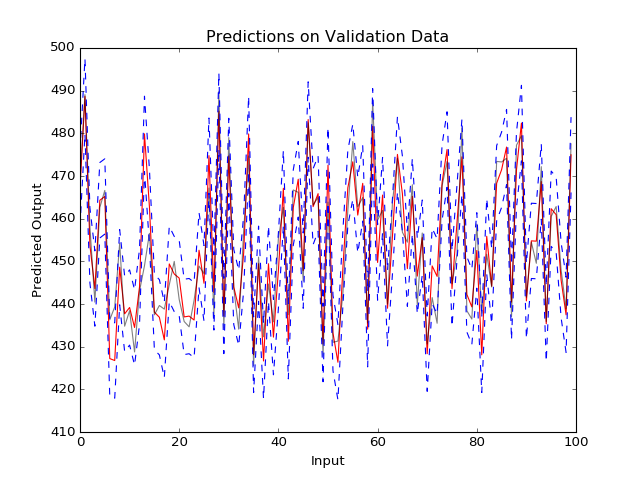

In [18]:
# Plot predictions and prediction intervals on Validation Data
plt.figure()
init_idx = 0
end_idx = 100
plt.plot(Yhat_va_np[init_idx:end_idx], 'r')
plt.plot(Yva[init_idx:end_idx], 'k', alpha=0.5)
Yhat_va_std = np.sqrt(sigma2*(1+np.diag(Xva[init_idx:end_idx,:].dot(Ri).dot(Xva[init_idx:end_idx,:].transpose()))))
plt.plot(Yhat_va_np[init_idx:end_idx] - tperc*Yhat_va_std, 'b--')
plt.plot(Yhat_va_np[init_idx:end_idx] + tperc*Yhat_va_std, 'b--')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.title('Predictions on Validation Data')
plt.show()

## Ordinary Least-Squares using scikit-learn

A fast way to compute the LS estimate is through sklearn.linear_model

In [19]:
# Remove the ``ones'' column in the features matrix (sklearn inserts it automatically)
Xtr = Xtr[:,1:]
Xva = Xva[:,1:]

In [20]:
from sklearn import linear_model
reg = linear_model.LinearRegression()  # build the object LinearRegression
reg.fit(Xtr, Ytr)  # estimate the LS coefficients
print "Intercept:", reg.intercept_
print "Least-Squares Coefficients:", reg.coef_
Yhat_tr_np = reg.predict(Xtr)  # predict output values on training set
Yhat_va_np = reg.predict(Xva)  # predict output values on validation set
sigma2 = reg.residues_/(Ntr-Xtr.shape[1]-1)  # reg.residues_ contains the sum of squared residuals
print "Training Error:", 1-reg.score(Xtr, Ytr)
print "Validation Error:", 1-reg.score(Xva, Yva)


Intercept: 454.156397943
Least-Squares Coefficients: [-14.64762065  -2.97704132   0.26957488  -2.16621616]
Training Error: 0.0688273590386
Validation Error: 0.0767281221041


C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)
